Источники: [Яндекс. Лекция 4: «Словари и сортировка подсчётом»](https://www.youtube.com/watch?v=Nb5mW1yWVSs&list=PL6Wui14DvQPySdPv5NUqV3i8sDbHkCKC5&index=6)

<br>Что такое "Словарь?"
<br>Что должно уметь Словарь?
<br>Что такое сортировка подсчетом?
<br>Как реализовать сортировку посчетом?

In [2]:
import time
import random

In [3]:
def calculate_time(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        execution_time = end_time - start_time
        print(f"Function {func.__name__} took {execution_time:.6f} seconds to execute.")
        return result
    return wrapper

# Сортировка подсчетом!

[Screenshot 2023-04-03 at 09.53.47.png](attachment:6cd3e3da-44bf-41a5-83f7-f2e0611a1c96.png)

- К должно быть не много, в нашем примере это оценки от 1 до 5. 
- Если значения К близки к 0, то можно выделить немного лишней памяти и делать прямое соответсвие идекса и значения. Если К далеки от 0, (например средне дневная температура в течение года в Ул от -17 до +27) тогда интервал можно сдвинуть (делать поправку -17 - 0-й индекс, +27 - макс индекс )

## Пример/реализация

In [1]:
def count_sort(seq):
    min_val = min(seq)
    max_val = max(seq)
    k = max_val - min_val + 1
    # создаем список с 0-ми
    count = [0]*k
    for el in seq:
        # если el и min_val, то индекс 0
        count[el - min_val] +=1
    now_pos = 0
    for val in range(0,k):
        for i in range(count[val]):
            seq[now_pos] = val + min_val
            now_pos += 1 
        

## Задача 1

<br>Даны два числа X и Y без ведущий нулей
<br>Нужно проверить, можно ли получить первое из второго

In [13]:
# вариант решения на сортировках с преобразованием в строку
@calculate_time
def is_anagram(x,y):
    if sorted(str(x)) == sorted(str(y)):
        return True
    return False

In [14]:
is_anagram(2021,1222)

Function is_anagram took 0.000008 seconds to execute.


False

Решение: посчитаем кол-во вхождений каждой цифры в каждое из числел и равним. Цифры будем постепенно добывать из числа справа с помощью %10 и //10

In [15]:
def is_digit_permut(x, y):
    def count_digits(num):
        digit_count = [0]*10
        
        while num > 0:
            last_digit = num%10 # определяем последнюю цыфру
            digit_count[last_digit] += 1
            num //=10 # отбрасываем последнюю цыфру
        return digit_count
    
    digits_x = count_digits(x)
    digits_y = count_digits(y)
    
    for digit in range(10):
        if digits_x[digit] != digits_y[digit]:
            return False
    return True

# Словари

Словарь - структура данных в которой есть "ключ" и соответствующее ему "значение". Ключи уникальны, значения могут повторяться, так же в качестве значения может быть список/кортеж и т.д..

--------------------
Словарь — неупорядоченная структура данных, которая позволяет хранить пары «ключ — значение».

--------------------
A dictionary in python is a mapping object that maps keys to values, where the keys are unique within a collection and the values can hold any arbitrary value. In addition to being unique, keys are also required to be hashable.

--------------------
dict (от английского «dictionary», словарь) – еще один тип данных в Python. Словари хранят пары ключ: значение. То есть в списках можно достать элемент, если указать его позицию в виде целого числа, а в словарях – тот самый ключ. dict – неупорядоченный тип данных, поэтому достать элемент по номеру не получится, но отображение содержимого будет в порядке добавления элементов. Уникальность ключей должна поддерживаться, чтобы всегда можно было быстро найти одно единственно верное значение.

- словарь - он как множество, но каждому ключю приписано значение
- искать по значению в словаре **нельзя!
- константа с ложности словарей намного больше чем у массивов (списках), поэтому где можно - лучше использовать сортировку подсчетом
- сортировку подсчетом не разумно использовать, если данные разреженные

## Задача 2

<br>На шахмотной достке N на N находятся M ладей
<br>(ладья бъет клетки на тоже горизонтали или вертикали до ближайшей занятой)
<br>Определите, сколько пар ладей бъет друг друга.
<br>Ладьи задаются парой чисел I и J, обозначающие координаты клетки
<br>$1 ≤ N ≤ 10^9, 0 ≤ M ≤ 2 {\cdot} 10^5$ 

Для каждой занятой горизонтали и вертикали будем хранить кол-во ладей на них.
кол-во пар в горизонтали (вертикали) равно кол-ву ладей минус 1. Суммируем это кол-во пар для всех горизонталей и вертикалей. 

In [16]:
def count_beating_riiks(rooks_coords):
    def add_rooks(row_or_col, key):
        if key not in row_or_col:
            row_or_col[key] = 0
        row_or_col[key] += 1
        
    def count_pairs(row_or_col):
        pairs = 0
        for key in row_or_col:
            pairs += row_or_col[key] - 1
        return pairs
    rooks_in_row = {}
    rooks_in_col = {}
    for row,col in rooks_coords:
        add_rooks(rooks_in_row, row)
        add_rooks(rooks_in_col, col)
    return count_pairs(rooks_in_row) + count_pairs(rooks_in_col)
    

## Задача 3

Дана строка S
Выведите гистограмму как в примере (коды символов отсортированы)
S = Hello, world!
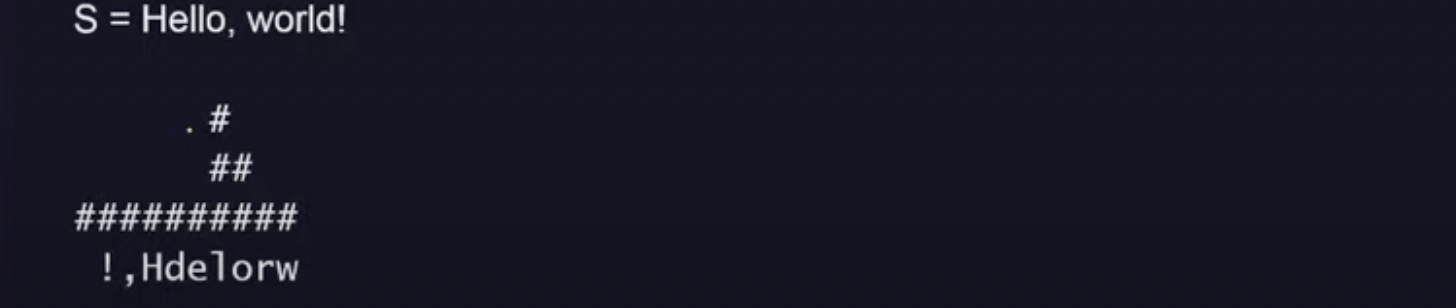

Решение: для каждого символа в словаре посчитаем сколько раз он встречался.
Найдем самый частый символ и переберем кол-во от этого числа до 1.
Пройдем по всем отсортированным ключам и если кол-во больше счетчика, то выведем #

In [25]:
@calculate_time
def print_chart(s):
    sym_count = {}
    max_sym_count = 0
    # заполняем частотный словарь
    for sym in s:
        if sym not in sym_count:
            sym_count[sym] = 0
        sym_count[sym] += 1
    # находим самый частовстреч-ся символ    
    max_sym_count = max(sym_count.values())
    # сортируем уникальные значения
    sorted_uniq_syms = sorted(sym_count.keys())
    # идем от максимума к 0
    for row in range(max_sym_count, 0, -1):
        for sym in sorted_uniq_syms:
            # если частота символа >= row
            if sym_count[sym] >= row:
                # печатаем "#"
                print('#', end = ' ')
            else:
                print(' ', end = ' ')
        print() # перевод строки
    print(' '.join(sorted_uniq_syms))

In [26]:
s = 'Hello, world!'
print_chart(s)

            #       
            # #     
# # # # # # # # # # 
  ! , H d e l o r w
Function print_chart took 0.000153 seconds to execute.


# Задел под оптимизацию

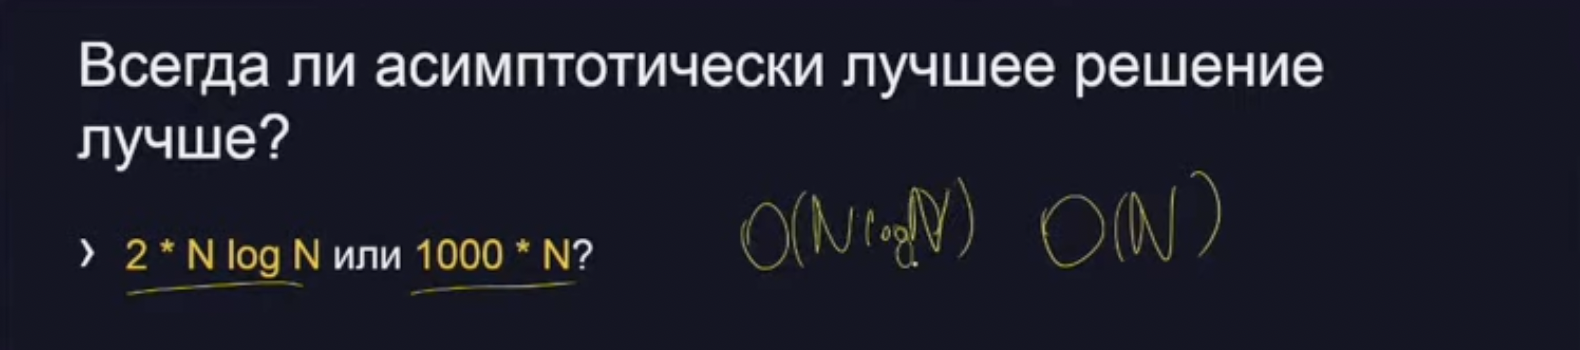

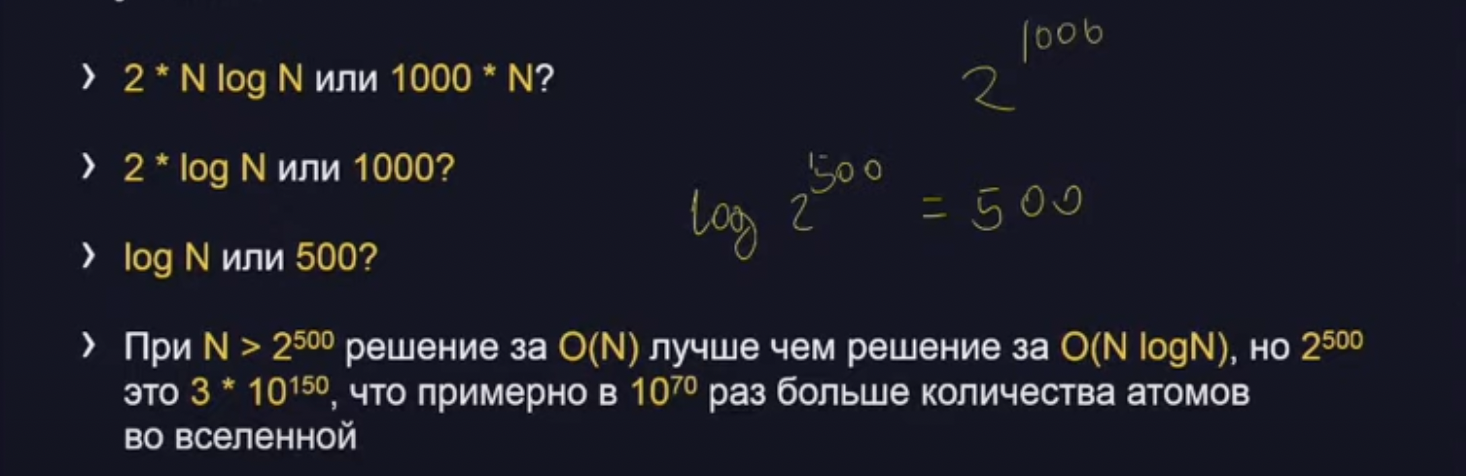

В реальности разница констант в **500** раз случается редко

Некоторые другие критерии качества алгоритмов:
- потребление памяти
- время на реализацию
- сложность поддержки
- возможность распараллеливания
- необходимая квалификация сотрудника
- стоимость оборудования

## Задача 4. Сгрупировать слова

Сгрупировать слова по общим буквам

<code>
simple input: ['eat','tea','tan','ate','nat','bat']
simple output: [['ate','eat','tea'],['nat','tan'],['bat']]
</code>
<br>
Решение:
отсортировать в каждом слове буквы и это будет выстапать ввиде ключа, а значеним будет список слов

In [49]:
@calculate_time
def sort_word(s):
    sort_word_dict = {}
    for word in s:
        sorted_word = str(sorted(word))
        if sorted_word not in sort_word_dict:
            sort_word_dict[sorted_word] = []
        sort_word_dict[sorted_word].append(word)  
    return [*sort_word_dict.values()]

In [46]:
@calculate_time
def group_words(words):
    groups = {}
    for word in words:
        sorted_word = ''.join(sorted(word))
        if sorted_word not in groups:
            groups[sorted_word] = []
        groups[sorted_word].append(word)
    ans = []
    for sorted_word in groups:
        ans.append(groups[sorted_word])
    return ans

In [50]:
s = ['eat','tea','tan','ate','nat','bat']
sort_word(s)

Function sort_word took 0.000029 seconds to execute.


[['eat', 'tea', 'ate'], ['tan', 'nat'], ['bat']]

In [51]:
group_words(s)

Function group_words took 0.000025 seconds to execute.


[['eat', 'tea', 'ate'], ['tan', 'nat'], ['bat']]

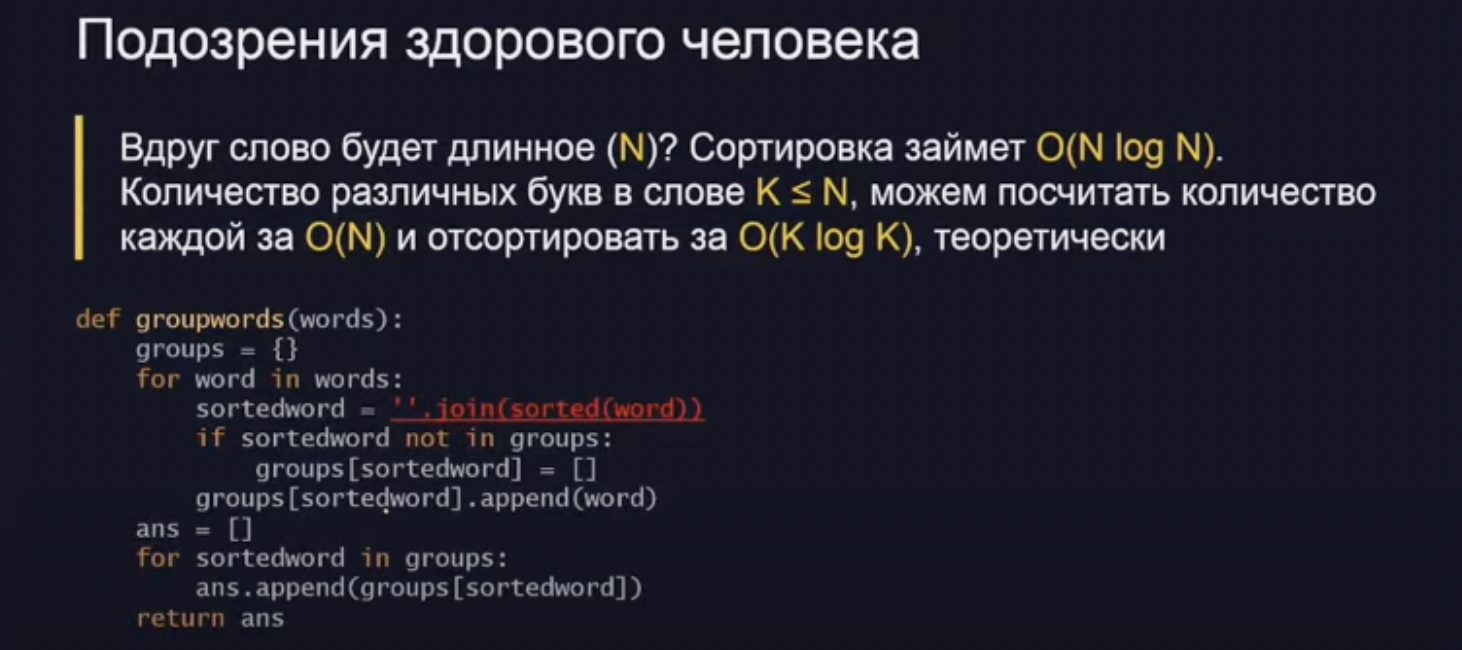
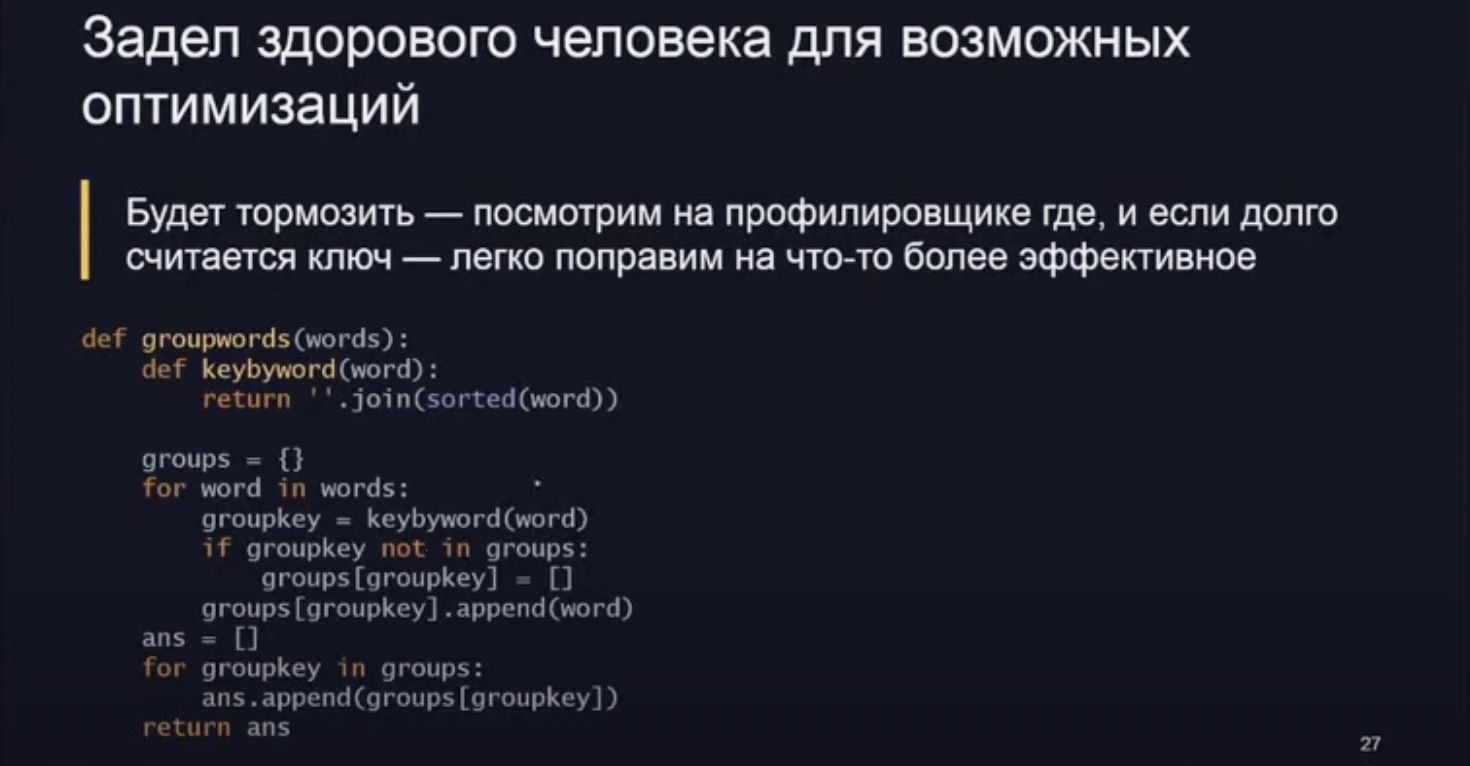
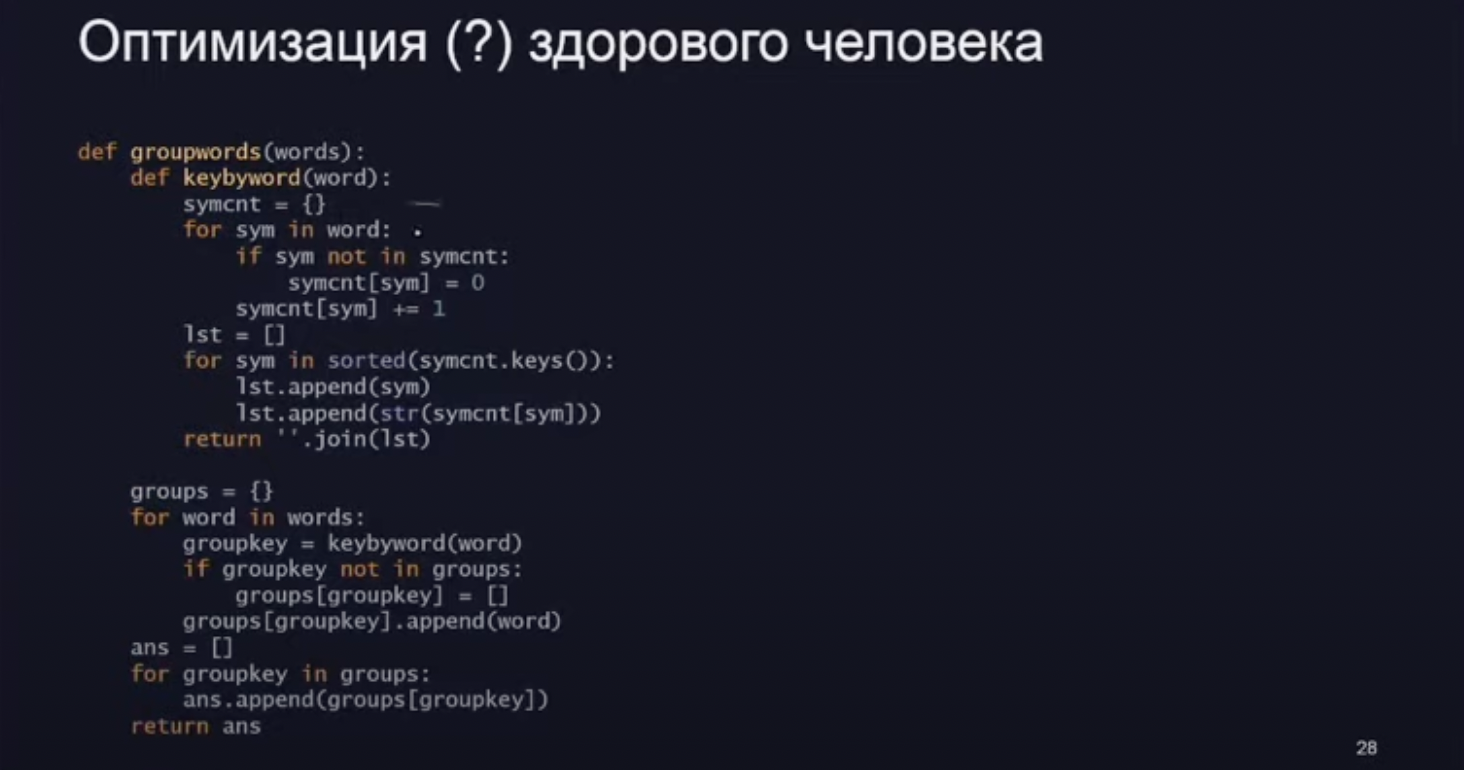
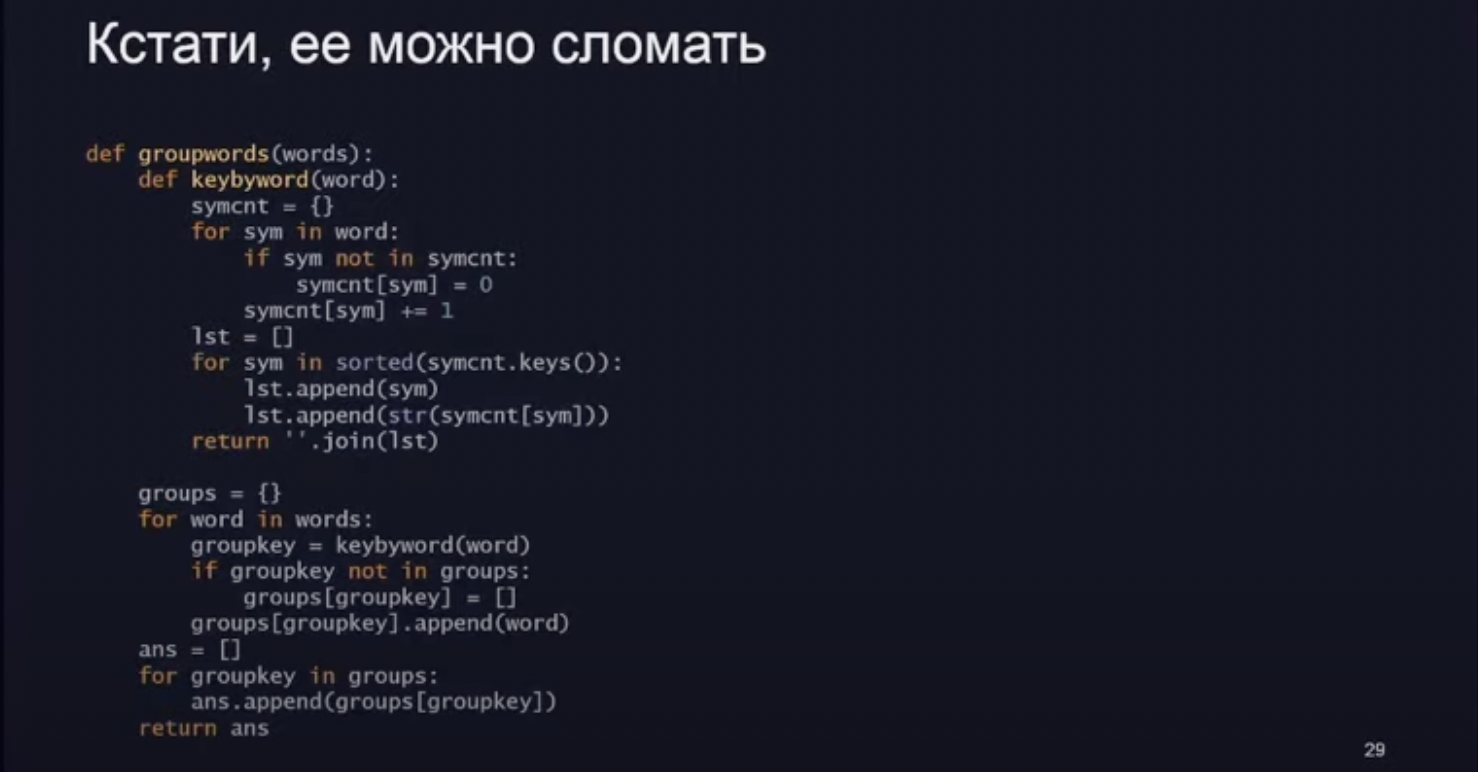 
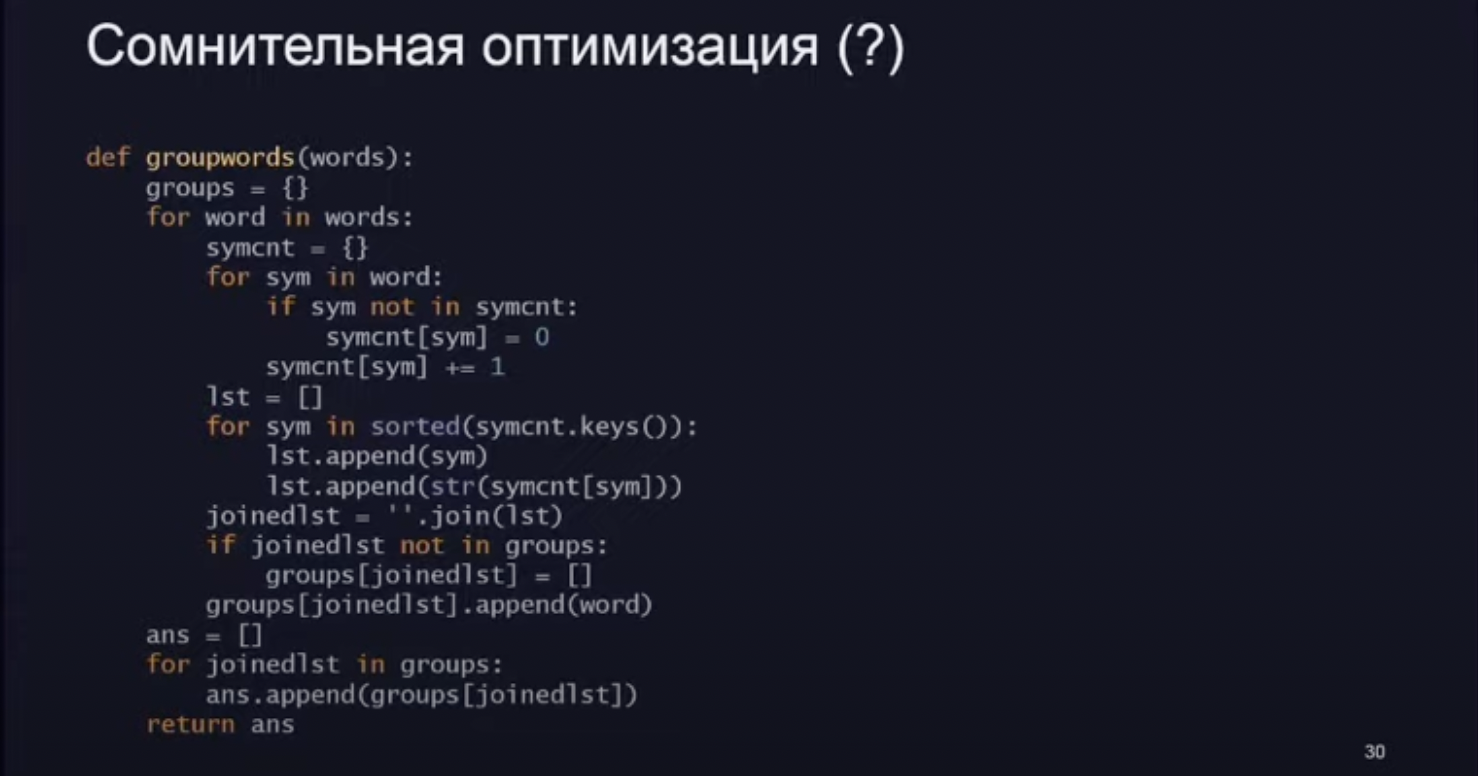
